In [2]:
import pandas as pd

In [3]:
dataAddr = "../data/pickledData.pckl"
data = pd.read_pickle(dataAddr)

## Dataset Statistics

In [10]:
data

,YEAR,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,...,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC
0,2022,4/1/2022 12:00:00 AM,9E,N132EV,4694.0,10397,ATL,"Atlanta, GA",10868,CAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,4/1/2022 12:00:00 AM,9E,N133EV,4729.0,14321,PWM,"Portland, ME",12953,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,4/1/2022 12:00:00 AM,9E,N133EV,4808.0,12478,JFK,"New York, NY",13487,MSP,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,4/1/2022 12:00:00 AM,9E,N133EV,4977.0,12953,LGA,"New York, NY",14122,PIT,...,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,4/1/2022 12:00:00 AM,9E,N133EV,5067.0,12953,LGA,"New York, NY",13577,MYR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8356186,2022,9/30/2022 12:00:00 AM,YX,NaN,5857.0,10693,BNA,"Nashville, TN",10721,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8356187,2022,9/30/2022 12:00:00 AM,YX,NaN,5858.0,10821,BWI,"Baltimore, MD",10721,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8356188,2022,9/30/2022 12:00:00 AM,YX,NaN,5861.0,10721,BOS,"Boston, MA",11057,CLT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8356189,2022,9/30/2022 12:00:00 AM,YX,NaN,5862.0,12339,IND,"Indianapolis, IN",10721,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['YEAR', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID',
       'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC'],
      dtype='object')

In [9]:
data.size 

434521932

In [11]:
data.size/len(data.columns) #Number of rows

8356191.0

In [14]:
data['YEAR'].value_counts()

YEAR
2022    5015622
2023    3340569
Name: count, dtype: int64

#### Delay Statistics

<Axes: >

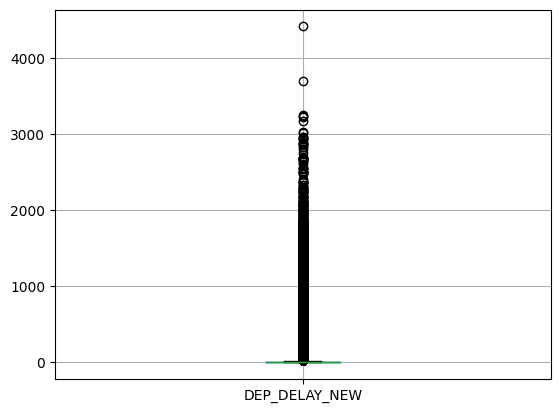

In [6]:
data.boxplot(column='DEP_DELAY_NEW')

In [19]:
only_delayed = data[data['DEP_DELAY_NEW'] > 0]

In [23]:
only_delayed.size/data.size #Percentage of flights delayed

0.3817991953510876

In [22]:
only_delayed['DEP_DELAY_NEW'].var() #Variance of delay

6137.273831646948

#### Presence of NA per Col

In [27]:
for col in data.columns:
    if(data[col].isna().any()):
        print(f"{col}:Yes")
    else:
        print(f"{col}:No")

YEAR:No
FL_DATE:No
OP_UNIQUE_CARRIER:No
TAIL_NUM:Yes
OP_CARRIER_FL_NUM:Yes
ORIGIN_AIRPORT_ID:No
ORIGIN:No
ORIGIN_CITY_NAME:No
DEST_AIRPORT_ID:No
DEST:No
DEST_CITY_NAME:No
CRS_DEP_TIME:No
DEP_TIME:Yes
DEP_DELAY:Yes
DEP_DELAY_NEW:Yes
DEP_DEL15:Yes
DEP_DELAY_GROUP:Yes
DEP_TIME_BLK:No
TAXI_OUT:Yes
WHEELS_OFF:Yes
WHEELS_ON:Yes
TAXI_IN:Yes
CRS_ARR_TIME:No
ARR_TIME:Yes
ARR_DELAY:Yes
ARR_DELAY_NEW:Yes
ARR_DEL15:Yes
ARR_DELAY_GROUP:Yes
ARR_TIME_BLK:No
CANCELLED:No
CANCELLATION_CODE:Yes
DIVERTED:No
CRS_ELAPSED_TIME:Yes
ACTUAL_ELAPSED_TIME:Yes
AIR_TIME:Yes
FLIGHTS:No
DISTANCE:No
DISTANCE_GROUP:No
CARRIER_DELAY:Yes
WEATHER_DELAY:Yes
NAS_DELAY:Yes
SECURITY_DELAY:Yes
LATE_AIRCRAFT_DELAY:Yes
FIRST_DEP_TIME:Yes
TOTAL_ADD_GTIME:Yes
LONGEST_ADD_GTIME:Yes
DEST_AIRPORT_SEQ_ID:Yes
DEST_CITY_MARKET_ID:Yes
DEST_STATE_ABR:Yes
DEST_STATE_FIPS:Yes
DEST_STATE_NM:Yes
DEST_WAC:Yes


In [28]:
for col in data.columns:
    if(data[col].isna().any()):
        print(f"{col}:Yes")

TAIL_NUM:Yes
OP_CARRIER_FL_NUM:Yes
DEP_TIME:Yes
DEP_DELAY:Yes
DEP_DELAY_NEW:Yes
DEP_DEL15:Yes
DEP_DELAY_GROUP:Yes
TAXI_OUT:Yes
WHEELS_OFF:Yes
WHEELS_ON:Yes
TAXI_IN:Yes
ARR_TIME:Yes
ARR_DELAY:Yes
ARR_DELAY_NEW:Yes
ARR_DEL15:Yes
ARR_DELAY_GROUP:Yes
CANCELLATION_CODE:Yes
CRS_ELAPSED_TIME:Yes
ACTUAL_ELAPSED_TIME:Yes
AIR_TIME:Yes
CARRIER_DELAY:Yes
WEATHER_DELAY:Yes
NAS_DELAY:Yes
SECURITY_DELAY:Yes
LATE_AIRCRAFT_DELAY:Yes
FIRST_DEP_TIME:Yes
TOTAL_ADD_GTIME:Yes
LONGEST_ADD_GTIME:Yes
DEST_AIRPORT_SEQ_ID:Yes
DEST_CITY_MARKET_ID:Yes
DEST_STATE_ABR:Yes
DEST_STATE_FIPS:Yes
DEST_STATE_NM:Yes
DEST_WAC:Yes
